In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# card_id	Unique card identifier
# first_active_month	'YYYY-MM', month of first purchase
# feature_1	Anonymized card categorical feature
# feature_2	Anonymized card categorical feature
# feature_3	Anonymized card categorical feature
# target	Loyalty numerical score calculated 2 months after historical and evaluation period

In [3]:
pathTrain = "train.csv"
train = pd.read_csv(pathTrain)
train.head(6)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09,C_ID_0894217f2f,4,2,0,0.871585


In [4]:
print(max(train['target']))
print(min(train['target']))

17.9650684
-33.21928095


Text(0.5,0.98,'Counts of categiories for features')

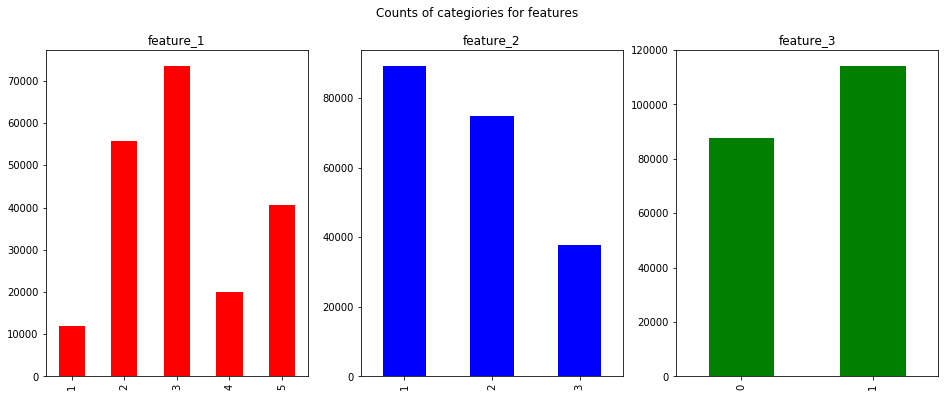

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
train['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red', title='feature_1')
train['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='blue', title='feature_2')
train['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='green', title='feature_3')
plt.suptitle('Counts of categiories for features')

In [6]:
train.groupby('feature_1', as_index=False).mean()

,feature_1,feature_2,feature_3,target
0,1,1.683310,0.0,-0.315476
1,2,1.683209,0.0,-0.350452
2,3,1.999130,1.0,-0.377533
3,4,1.727131,0.0,-0.404652
4,5,1.398695,1.0,-0.499879


In [7]:
train.groupby('feature_2', as_index=False).mean()

,feature_2,feature_1,feature_3,target
0,1,3.230071,0.549495,-0.398675
1,2,3.122690,0.542685,-0.332899
2,3,2.776668,0.648747,-0.501889


In [8]:
train.groupby('feature_3', as_index=False).mean()

,feature_3,feature_1,feature_2,target
0,0,2.316157,1.693179,-0.357939
1,1,3.711484,1.785530,-0.421057


### Relatively old customers have diverse target values, while new ones have less diverse targe values.

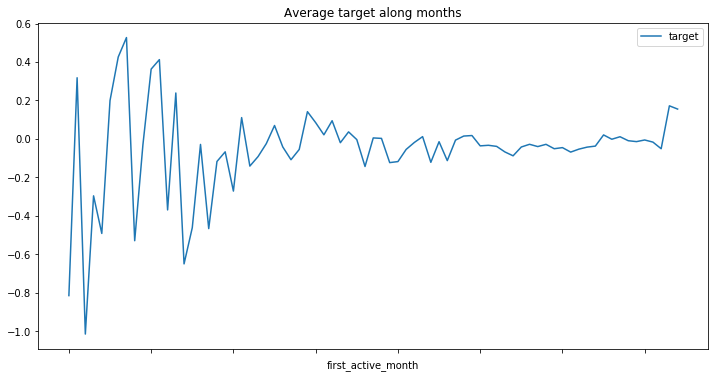

In [9]:
recency_target = train[train.target>-10].pivot_table(values='target', 
                                   index=['first_active_month'],
                                   aggfunc=np.mean)

recency_target.plot(title='Average target along months', figsize=(12,6))

Text(0.5,1,'Target distribution')

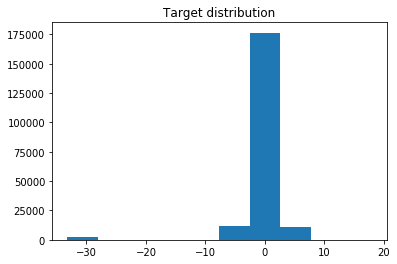

In [10]:
plt.hist(train['target'])
plt.title('Target distribution')

# The graph recommends that we can remove observations with target less than -10

In [11]:
# card_id	Card identifier
# month_lag	month lag to reference date
# purchase_date	Purchase date
# authorized_flag	Y' if approved, 'N' if denied
# category_3	anonymized category
# installments	number of installments of purchase
# category_1	anonymized category
# merchant_category_id	Merchant category identifier (anonymized )
# subsector_id	Merchant category group identifier (anonymized )
# merchant_id	Merchant identifier (anonymized)
# purchase_amount	Normalized purchase amount
# city_id	City identifier (anonymized )
# state_id	State identifier (anonymized )
# category_2	anonymized category

In [12]:
pathHisTransac = "historical_transactions.csv"
histTransaction = pd.read_csv(pathHisTransac)

In [13]:
histTransaction.head(6)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37


In [14]:
"""

merchant_id	Unique merchant identifier
merchant_group_id	Merchant group (anonymized )
merchant_category_id	Unique identifier for merchant category (anonymized )
subsector_id	Merchant category group (anonymized )
numerical_1	anonymized measure
numerical_2	anonymized measure
category_1	anonymized category
most_recent_sales_range	Range of revenue (monetary units) in last active month --> A > B > C > D > E
most_recent_purchases_range	Range of quantity of transactions in last active month --> A > B > C > D > E
avg_sales_lag3	Monthly average of revenue in last 3 months divided by revenue in last active month
avg_purchases_lag3	Monthly average of transactions in last 3 months divided by transactions in last active month
active_months_lag3	Quantity of active months within last 3 months
avg_sales_lag6	Monthly average of revenue in last 6 months divided by revenue in last active month
avg_purchases_lag6	Monthly average of transactions in last 6 months divided by transactions in last active month
active_months_lag6	Quantity of active months within last 6 months
avg_sales_lag12	Monthly average of revenue in last 12 months divided by revenue in last active month
avg_purchases_lag12	Monthly average of transactions in last 12 months divided by transactions in last active month
active_months_lag12	Quantity of active months within last 12 months
category_4	anonymized category
city_id	City identifier (anonymized )
state_id	State identifier (anonymized )
category_2	anonymized category

"""

'\n\nmerchant_id\tUnique merchant identifier\nmerchant_group_id\tMerchant group (anonymized )\nmerchant_category_id\tUnique identifier for merchant category (anonymized )\nsubsector_id\tMerchant category group (anonymized )\nnumerical_1\tanonymized measure\nnumerical_2\tanonymized measure\ncategory_1\tanonymized category\nmost_recent_sales_range\tRange of revenue (monetary units) in last active month --> A > B > C > D > E\nmost_recent_purchases_range\tRange of quantity of transactions in last active month --> A > B > C > D > E\navg_sales_lag3\tMonthly average of revenue in last 3 months divided by revenue in last active month\navg_purchases_lag3\tMonthly average of transactions in last 3 months divided by transactions in last active month\nactive_months_lag3\tQuantity of active months within last 3 months\navg_sales_lag6\tMonthly average of revenue in last 6 months divided by revenue in last active month\navg_purchases_lag6\tMonthly average of transactions in last 6 months divided by t

In [15]:
pathMerchats = "merchants.csv"
merchants = pd.read_csv(pathMerchats)

In [16]:
merchants.head(6)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0


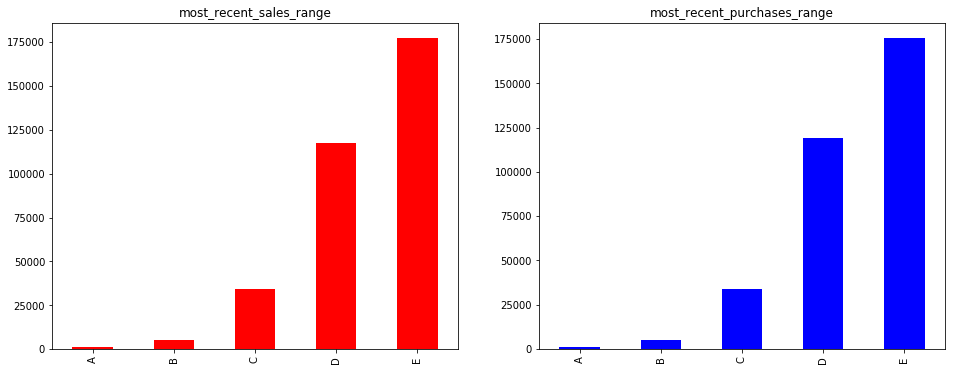

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
merchants['most_recent_sales_range'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='red', title='most_recent_sales_range')
merchants['most_recent_purchases_range'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='blue', title='most_recent_purchases_range')

In [18]:
merchants.most_recent_purchases_range.value_counts().sort_index()

A      1010
B      5046
C     34144
D    119187
E    175309
Name: most_recent_purchases_range, dtype: int64

In [19]:
merchants.most_recent_sales_range.value_counts().sort_index()

A      1005
B      5037
C     34075
D    117475
E    177104
Name: most_recent_sales_range, dtype: int64

In [20]:
print(merchants.category_1.value_counts().sort_index())
print(merchants.category_2.value_counts().sort_index())
print(merchants.category_4.value_counts().sort_index())

N    327657
Y      7039
Name: category_1, dtype: int64
1.0    160888
2.0     20661
3.0     51887
4.0     36450
5.0     52923
Name: category_2, dtype: int64
N    238596
Y     96100
Name: category_4, dtype: int64


In [21]:
# map_dict = {'N': 'N', 'Y': 'Y'}
# merchants_removeinf = merchants[merchants.avg_purchases_lag3 < 1E308 && merchants.avg_purchases_lag6 < 1E308 && merchants.avg_purchases_lag12 < 1E308]
# merchants['category_1'] = merchants['category_1'].apply(lambda x: map_dict[str(x)])
# merchants.groupby(['category_1']).agg({'avg_purchases_lag3': ['mean', 'std'], 'avg_purchases_lag6': ['mean', 'std'], 'avg_purchases_lag12': ['mean', 'std']})

In [22]:
merchants.avg_purchases_lag12[merchants.avg_purchases_lag12 < 1E308].mean()

2.0791954108498123

In [23]:
merchants.avg_purchases_lag6[merchants.avg_purchases_lag6 < 1E308].mean()

1.8875678157761644

In [24]:
merchants.avg_purchases_lag3[merchants.avg_purchases_lag3 < 1E308].mean()

1.5907620965243745

In [25]:
"""
card_id	Card identifier
month_lag	month lag to reference date
purchase_date	Purchase date
authorized_flag	Y' if approved, 'N' if denied
category_3	anonymized category
installments	number of installments of purchase
category_1	anonymized category
merchant_category_id	Merchant category identifier (anonymized )
subsector_id	Merchant category group identifier (anonymized )
merchant_id	Merchant identifier (anonymized)
purchase_amount	Normalized purchase amount
city_id	City identifier (anonymized )
state_id	State identifier (anonymized )
category_2	anonymized category

"""

"\ncard_id\tCard identifier\nmonth_lag\tmonth lag to reference date\npurchase_date\tPurchase date\nauthorized_flag\tY' if approved, 'N' if denied\ncategory_3\tanonymized category\ninstallments\tnumber of installments of purchase\ncategory_1\tanonymized category\nmerchant_category_id\tMerchant category identifier (anonymized )\nsubsector_id\tMerchant category group identifier (anonymized )\nmerchant_id\tMerchant identifier (anonymized)\npurchase_amount\tNormalized purchase amount\ncity_id\tCity identifier (anonymized )\nstate_id\tState identifier (anonymized )\ncategory_2\tanonymized category\n\n"

In [26]:
pathNewMerchants = "new_merchant_transactions.csv"
newMerchants = pd.read_csv(pathNewMerchants)

In [27]:
newMerchants.head(6)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16


In [28]:
# map_dict = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
# historical_transactions['category_3'] = historical_transactions['category_3'].apply(lambda x: map_dict[str(x)])
# historical_transactions.groupby(['category_3']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

In [93]:
# number of new merchants per card_id

cardMerchant = newMerchants[["card_id","merchant_id"]].groupby('card_id')['merchant_id'].nunique()
cardMerchant = cardMerchant.to_frame()

finalTrain = pd.merge(train, cardMerchant, how='left', left_on='card_id', right_on='card_id')
finalTrain.loc[finalTrain.merchant_id.isnull(), 'merchant_id'] = 0

In [94]:
finalTrain.rename(columns={'merchant_id':'num_newMerchant'}, inplace=True)

In [95]:
# total amount spent in new merchants

amountNew = newMerchants[['card_id', 'purchase_amount']].groupby('card_id')['purchase_amount'].sum()
amountNew = amountNew.to_frame()

finalTrain = pd.merge(finalTrain, amountNew, how='left', left_on='card_id', right_on='card_id')
finalTrain.rename(columns={'purchase_amount':'new_amount'}, inplace=True)

In [96]:
finalTrain.loc[finalTrain.new_amount.isnull(), 'new_amount'] = 0

In [97]:
# time of file

finalTrain.first_active_month = pd.to_datetime(finalTrain.first_active_month)
finalTrain['tof'] = pd.Series((max(finalTrain.first_active_month) - finalTrain.first_active_month), 
                              index=finalTrain.index)
finalTrain['tof'] = finalTrain['tof'] / np.timedelta64(1, 'D')/30
finalTrain.rename(columns={'tof':'tof(months)'}, inplace=True)

In [98]:
# total amount spent in historical transactions

amountHistory = histTransaction[['card_id', 'purchase_amount']].groupby('card_id')['purchase_amount'].sum()
amountHistory = amountHistory.to_frame()

finalTrain = pd.merge(finalTrain, amountHistory, how='left', left_on='card_id', right_on='card_id')
finalTrain.rename(columns={'purchase_amount':'historical_amount'}, inplace=True)

### One card can have transactions in different cities and states

In [99]:
# City

city = histTransaction[['card_id', 'city_id']]
city = city.drop_duplicates(keep='first', inplace=False, subset=None)
city = city.groupby('card_id')['city_id'].nunique()
city = city.to_frame()

finalTrain = pd.merge(finalTrain, city, how='left', left_on='card_id', right_on='card_id')
finalTrain.rename(columns={'city_id':'num_Cities'}, inplace=True)

In [100]:
# State

state = histTransaction[['card_id', 'state_id']]
state = state.drop_duplicates(keep='first', inplace=False, subset=None)
state.head(7)

,card_id,state_id
0,C_ID_4e6213e9bc,16
5,C_ID_4e6213e9bc,9
11,C_ID_4e6213e9bc,-1
400,C_ID_5037ff576e,11
401,C_ID_5037ff576e,15
403,C_ID_5037ff576e,16
404,C_ID_5037ff576e,17


In [101]:
finalTrain = finalTrain.drop(['first_active_month'], axis=1)

In [102]:
finalTrain.tail(6)

,card_id,feature_1,feature_2,feature_3,target,num_newMerchant,new_amount,tof(months),historical_amount,num_Cities
201911,C_ID_0443db161f,3,3,1,0.100164,1.0,-0.176952,36.533333,-4.105694,6
201912,C_ID_963962de2c,3,2,1,-2.740821,1.0,-0.693549,5.100000,-32.625247,5
201913,C_ID_1314773c0b,3,1,1,0.312917,1.0,-0.743902,28.466667,-33.432922,3
201914,C_ID_7666735b3d,4,3,0,0.093494,3.0,-0.723797,6.133333,-33.187479,10
201915,C_ID_73f5a0efd0,3,2,1,-4.676589,5.0,1.930261,19.333333,-17.888957,2
201916,C_ID_92c9984c58,3,1,1,-1.859413,8.0,-3.580382,7.166667,-83.037556,4


In [103]:
finalTrain.dtypes

card_id               object
feature_1              int64
feature_2              int64
feature_3              int64
target               float64
num_newMerchant      float64
new_amount           float64
tof(months)          float64
historical_amount    float64
num_Cities             int64
dtype: object

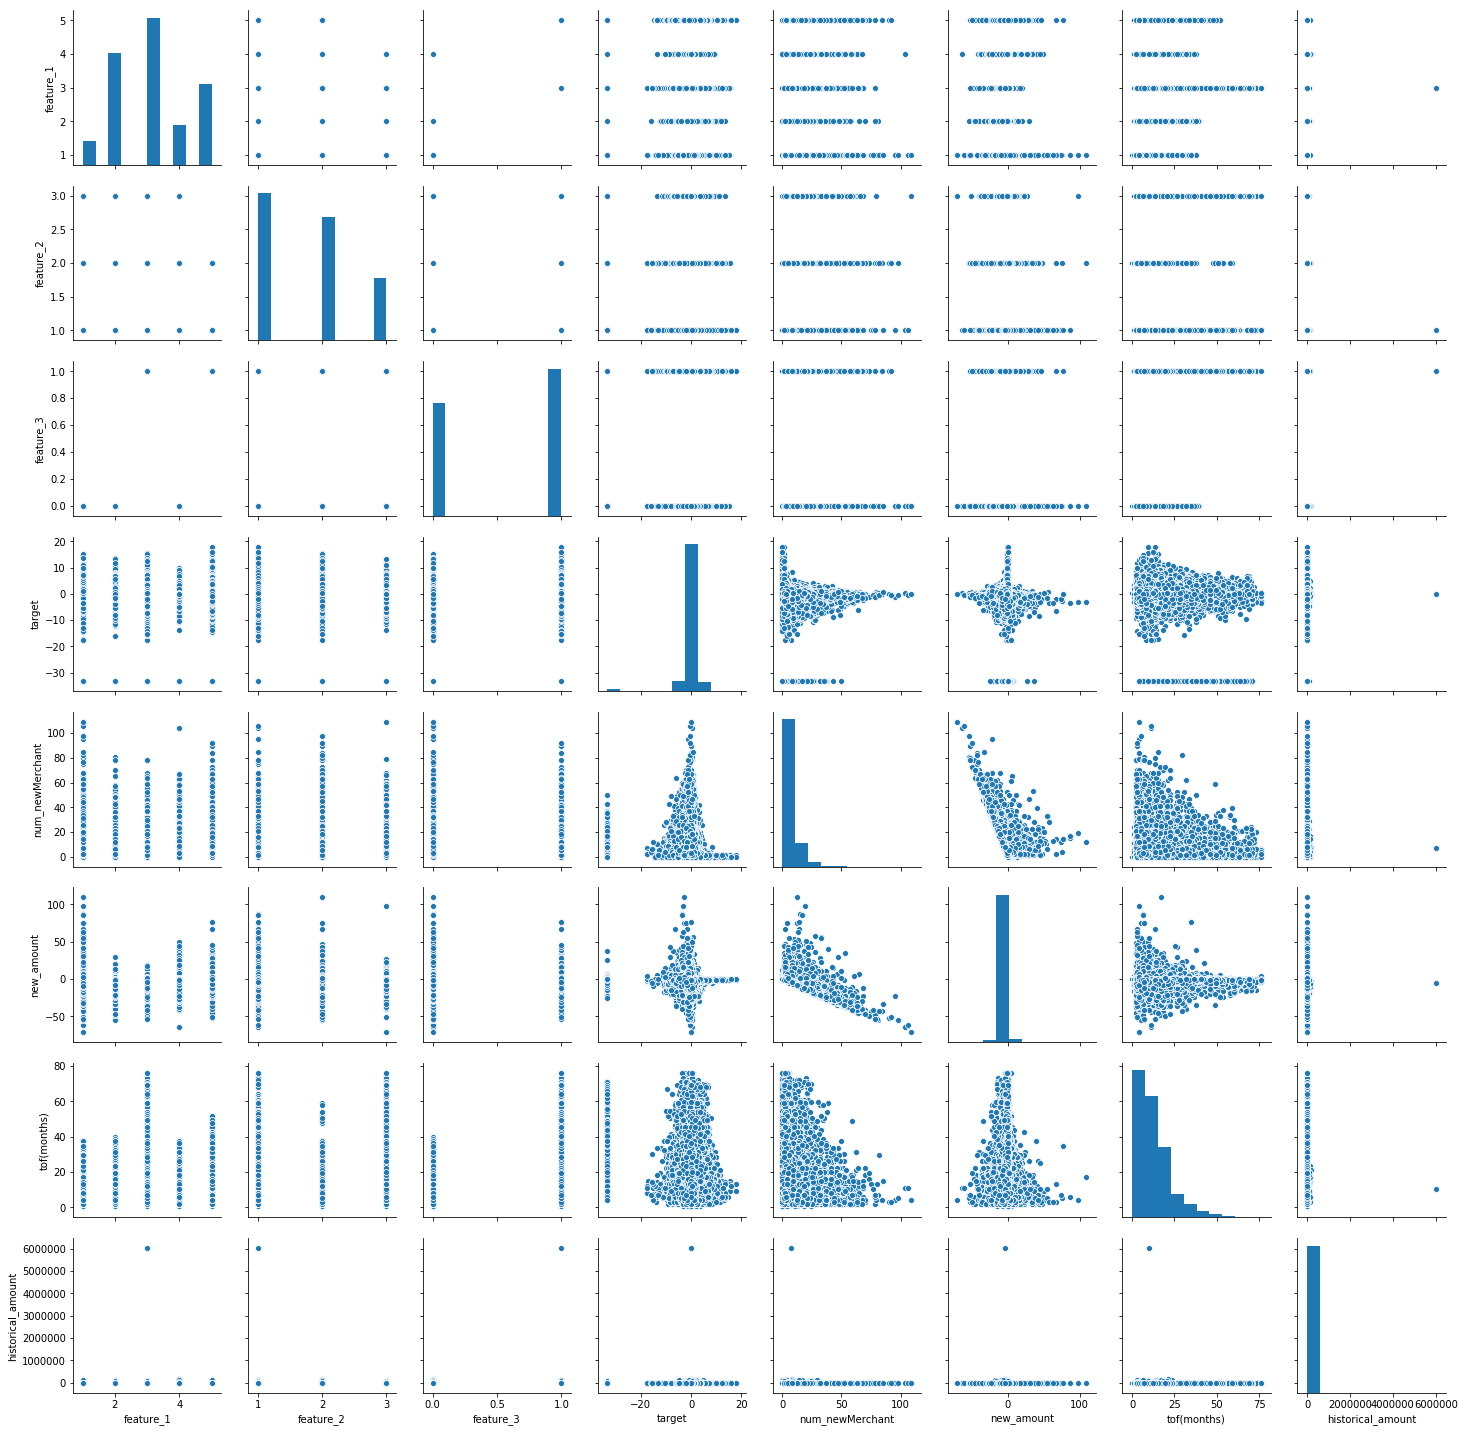

In [40]:
sns.pairplot(finalTrain.iloc[:,1:9])

In [104]:
finalTrain = finalTrain.iloc[:,1:10]
finalTrain['historical_amount'].describe()

# finalTrain['historical_amount'] = np.log(finalTrain['historical_amount'])



count    2.019170e+05
mean     1.442567e+01
std      1.344916e+04
min     -2.088013e+03
25%     -6.584727e+01
50%     -3.038694e+01
75%     -1.246938e+01
max      6.010596e+06
Name: historical_amount, dtype: float64

In [105]:
finalTrain['norm_hist_amount'] = (finalTrain['historical_amount'] - 
                                  np.mean(finalTrain['historical_amount']))/np.std(finalTrain['historical_amount'])
finalTrain.norm_hist_amount.describe()

count    2.019170e+05
mean    -1.403571e-17
std      1.000002e+00
min     -1.563253e-01
25%     -5.968637e-03
50%     -3.332010e-03
75%     -1.999762e-03
max      4.469125e+02
Name: norm_hist_amount, dtype: float64

In [106]:
finalTrain.drop(['historical_amount'], axis=1).corr()

,feature_1,feature_2,feature_3,target,num_newMerchant,new_amount,tof(months),num_Cities,norm_hist_amount
feature_1,1.000000,-0.130969,0.583092,-0.014251,-0.033784,0.036799,0.117144,0.035548,-0.000015
feature_2,-0.130969,1.000000,0.060925,-0.006242,-0.041972,-0.009560,0.158150,-0.068914,-0.002228
feature_3,0.583092,0.060925,1.000000,-0.008125,-0.095304,0.034014,0.196046,-0.056220,0.001853
target,-0.014251,-0.006242,-0.008125,1.000000,-0.046920,0.019607,-0.050453,-0.006320,0.000154
num_newMerchant,-0.033784,-0.041972,-0.095304,-0.046920,1.000000,-0.862832,-0.152651,0.384465,-0.000776
new_amount,0.036799,-0.009560,0.034014,0.019607,-0.862832,1.000000,0.117408,-0.300110,0.000492
tof(months),0.117144,0.158150,0.196046,-0.050453,-0.152651,0.117408,1.000000,0.034233,-0.000825
num_Cities,0.035548,-0.068914,-0.056220,-0.006320,0.384465,-0.300110,0.034233,1.000000,-0.003418
norm_hist_amount,-0.000015,-0.002228,0.001853,0.000154,-0.000776,0.000492,-0.000825,-0.003418,1.000000


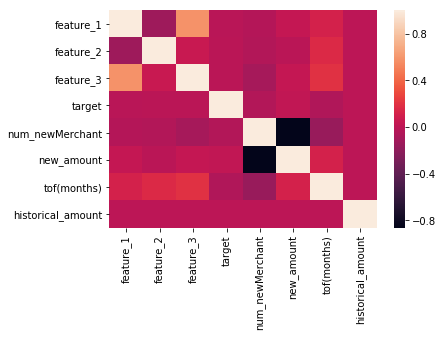

In [43]:
sns.heatmap(finalTrain.corr(), xticklabels=finalTrain.corr().columns,yticklabels=finalTrain.corr().columns)

In [107]:
testFinalTrain = finalTrain.drop(['historical_amount'], axis=1)
testFinalTrain.head(6)

,feature_1,feature_2,feature_3,target,num_newMerchant,new_amount,tof(months),num_Cities,norm_hist_amount
0,5,2,1,-0.820283,23.0,-13.244202,8.166667,7,-0.013413
1,4,1,0,0.392913,6.0,-4.355735,13.200000,9,-0.016687
2,2,2,0,0.688056,1.0,-0.700326,18.300000,5,-0.003241
3,4,3,0,0.142495,7.0,-4.654372,5.100000,7,-0.004753
4,1,3,0,-0.159749,36.0,-19.926237,3.066667,6,-0.004693
5,4,2,0,0.871585,4.0,-1.400065,17.266667,4,-0.002097


In [116]:
Y = testFinalTrain['target']
X = testFinalTrain.iloc[:,4:9]

# 20% of data goes to test data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [117]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

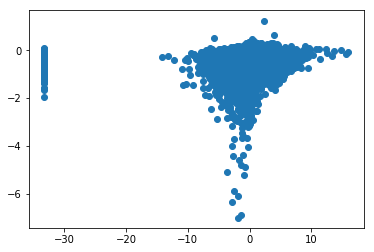

In [118]:
predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)